# Introduction to Linear Optimization in Python

I am using an example I borrowed from [here](http://isaacslavitt.com/2014/06/20/linear-optimization-in-python/). 

## Giapetto Woodcarving Inc. Example

Giapetto’s Woodcarving, Inc., manufactures two types of wooden toys: soldiers and trains.

A soldier sells for 27 dollars and uses 10 dollars worth of raw materials. Each soldier that is manufactured increases Giapetto’s variable labor and overhead costs by 14 dollars. A train sells for 21 dollars and uses 9 dollars worth of raw materials. Each train built increases Giapetto’s variable labor and overhead costs by 10 dollars. The manufacture of wooden soldiers and trains requires two types of skilled labor: carpentry and finishing. A soldier requires 2 hours of finishing labor and 1 hour of carpentry labor. A train requires 1 hour of finishing labor and 1 hour of carpentry labor. Each week, Giapetto can obtain all the needed raw material but only 100 finishing hours and 80 carpentry hours. Demand for trains is unlimited, but at most 40 soldiers are bought each week. Giapetto wants to maximize weekly profit (revenues-costs).

Formulate a mathematical model of Giapetto’s situation that can be used to maximize Giapetto’s weekly profit.

## Set up
I used the [Anaconda](https://docs.continuum.io/anaconda/install) as my base Python library.
You then need to install these two libraries:
1. Pulp (main optimizaiton library)
> pip install pulp
2. seaborn (for graphing)
> conda install seaborn

In [2]:
import numpy as np
import pulp

# create the LP object, set up as a maximization problem
prob = pulp.LpProblem('Giapetto', pulp.LpMaximize)

# set up decision variables
soldiers = pulp.LpVariable('soldiers', lowBound=0, cat='Integer')
trains = pulp.LpVariable('trains', lowBound=0, cat='Integer')

### Add the objective function

In [3]:
# model weekly production costs
raw_material_costs = 10 * soldiers + 9 * trains
variable_costs = 14 * soldiers + 10 * trains

# model weekly revenues from toy sales
revenues = 27 * soldiers + 21 * trains

# use weekly profit as the objective function to maximize
profit = revenues - (raw_material_costs + variable_costs)
prob += profit  # here's where we actually add it to the obj function

### Add constraints

In [4]:
# add constraints for available labor hours
carpentry_hours = soldiers + trains
prob += (carpentry_hours <= 80)

finishing_hours = 2*soldiers + trains
prob += (finishing_hours <= 100)

# add constraint representing demand for soldiers
prob += (soldiers <= 40)

### Print for a sanity check

In [5]:
print(prob)

Giapetto:
MAXIMIZE
3*soldiers + 2*trains + 0
SUBJECT TO
_C1: soldiers + trains <= 80

_C2: 2 soldiers + trains <= 100

_C3: soldiers <= 40

VARIABLES
0 <= soldiers Integer
0 <= trains Integer



### Solve problem and print results

In [6]:
# solve the LP using the default solver
optimization_result = prob.solve()

# make sure we got an optimal solution
assert optimization_result == pulp.LpStatusOptimal

# display the results
for var in (soldiers, trains):
    print('Optimal weekly number of {} to produce: {:1.0f}'.format(var.name, var.value()))

Optimal weekly number of soldiers to produce: 20
Optimal weekly number of trains to produce: 60


### Graphically validate answer
Used [mathurl.com](http.mathurl.com) to generate image urls from latex code. Add __.png__ at end of generated url.
#### Equations
<img style="float:left;" src=http://mathurl.com/hwkvky2.png >

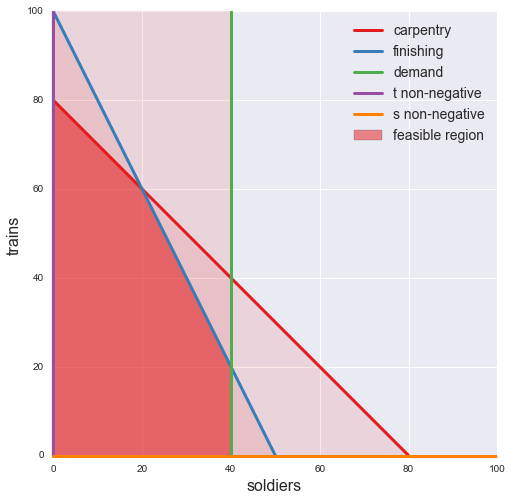

In [7]:
%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib.path import Path
from matplotlib.patches import PathPatch

# use seaborn to change the default graphics to something nicer
# and set a nice color palette
import seaborn as sns
sns.set_palette('Set1')

# create the plot object
fig, ax = plt.subplots(figsize=(8, 8))
s = np.linspace(0, 100)

# add carpentry constraint: trains <= 80 - soldiers
plt.plot(s, 80 - s, lw=3, label='carpentry')
plt.fill_between(s, 0, 80 - s, alpha=0.1)

# add finishing constraint: trains <= 100 - 2*soldiers
plt.plot(s, 100 - 2 * s, lw=3, label='finishing')
plt.fill_between(s, 0, 100 - 2 * s, alpha=0.1)

# add demains constraint: soldiers <= 40
plt.plot(40 * np.ones_like(s), s, lw=3, label='demand')
plt.fill_betweenx(s, 0, 40, alpha=0.1)

# add non-negativity constraints
plt.plot(np.zeros_like(s), s, lw=3, label='t non-negative')
plt.plot(s, np.zeros_like(s), lw=3, label='s non-negative')

# highlight the feasible region
path = Path([
    (0., 0.),
    (0., 80.),
    (20., 60.),
    (40., 20.),
    (40., 0.),
    (0., 0.),
])
patch = PathPatch(path, label='feasible region', alpha=0.5)
ax.add_patch(patch)

# labels and stuff
plt.xlabel('soldiers', fontsize=16)
plt.ylabel('trains', fontsize=16)
plt.xlim(-0.5, 100)
plt.ylim(-0.5, 100)
plt.legend(fontsize=14)
plt.show()